In [9]:
import pandas as pd
import numpy as np 
from random import randint, random
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from synonym import tweet_scraper, get_synonym

In [13]:
depression = get_synonym('https://www.textfocus.net/synonyme/d%C3%A9pression')[:1]
etudiant = get_synonym('https://www.textfocus.net/synonyme/%C3%A9tudiant')[1:]
maladie = ['COVID-19', 'confinement', 'coronavirus', 'corona', 'sars-cov19', 'covid']

In [14]:
results = []
for i in maladie:
    for j in depression:
        for k in etudiant:
            url_pattern = "https://twitter.com/search?q={}%20{}%20d{}%20since%3A2020-03-16&src=typed_query".format(i,j,k)
            results.append(tweet_scraper(url_pattern))
            
            
            
            
#-------ARGS-----------------------------------#

# URL = 'https://twitter.com/hashtag/etudiantsfantomes'
# URL = 'https://twitter.com/search?q=covid%20étudiants%20d%C3%A9pression%20since%3A2020-03-16&src=typed_query'


KeyboardInterrupt: 

In [15]:
results

[Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataFrame
 Columns: [date, text]
 Index: [],
 Empty DataF

------------------------

In [2]:
import re

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [3]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
qsearch = pd.read_csv("tweets_1.csv",parse_dates=['date'], usecols = ["date","text"], date_parser=dateparse)
sos_amitie = pd.read_csv("sos_amitie.csv",parse_dates=['date'], usecols = ["date","text"])

In [4]:
qsearch

,date,text
0,2021-01-04,vous vous êtes déjà posé des questions sur vot...
1,2021-01-04,vous pensez que la récente depression de beauc...
2,2021-01-24,Être étudiant en période de Covid-19 + être su...
3,2020-05-02,"Des milliers de jeunes adultes, des milliers d..."
4,2021-01-14,#Covid_19 : l'épidémie a fait 69 000 morts en ...
...,...,...
63,2021-03-24,...\nDonc en fait même avec Ebola faudrait jus...
64,2021-03-24,Non \nJustement le covid n'est pas ébola et il...
65,2021-03-22,Le pays est littéralement en PLS à cause du Co...
66,2021-03-22,Le pays est littéralement en PLS à cause du Co...


In [5]:
# datamanagement

qsearch["text"] = qsearch["text"].apply(clean_text)
qsearch = qsearch.set_index('date').sort_index()#.drop_duplicates()
sos_amitie["text"] = sos_amitie["text"].apply(clean_text)
sos_amitie = sos_amitie.set_index('date').sort_index()

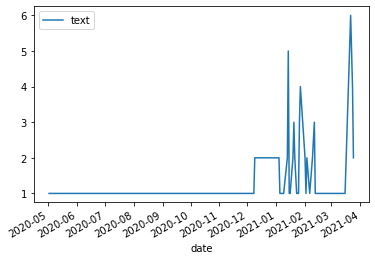

In [6]:
qsearch.groupby("date").count().plot(kind= 'line')

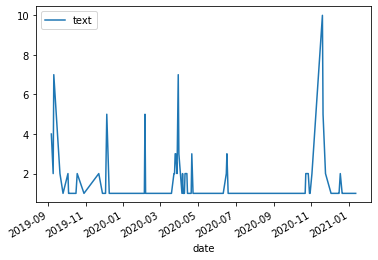

In [7]:
sos_amitie.groupby("date").count().plot(kind= 'line')

-----------------------

In [8]:
import spacy
nlp = spacy.load("fr_core_news_sm")

from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))

In [61]:
def return_token(sentence):
    return [X.text for X in nlp(sentence)]

def return_token_sent(sentence):
    return [X.text for X in nlp(sentence).sents]

def clean_stop_word(token):
    return [t for t in token if t not in stop_words]

def return_NER(sentence): #entité_nommee
    if type(sentence) is list or type(sentence) == "pandas.core.series.Series" :
        res = []
        for s in sentence:
            res.extend([(X.text, X.label_) for X in nlp(s).ents])
            return res
#     else: 
#         return [(X.text, X.label_) for X in nlp(sentence).ents]

def return_POS(sentence): #morpho_synthax
    if type(sentence) is list or type(sentence) == "pandas.core.series.Series" :
        res = []
        for s in sentence:
            res.extend([(X, X.pos_) for X in nlp(s)])
        return res
    else:
        return [(X, X.pos_) for X in nlp(sentence)]

In [63]:
qsearch["tokens"] = qsearch.text.apply(return_token)#.apply(clean_stop_word
qsearch["tokens"].apply(return_POS)
# sos_amitie["token"] = sos_amitie.text.apply(return_token).apply(clean_stop_word)

date
2020-05-02    [(des, ADP), (milliers, NOUN), (de, ADP), (jeu...
2020-08-10    [(je, PRON), (plains, ADJ), (réellement, ADV),...
2020-10-19    [(ok, VERB), (liste, NOUN), (de, ADP), (sujets...
2020-11-05    [(effet, NOUN), (collatéral, NOUN), ( , SPACE)...
2020-11-11    [(des, ADP), (doctorants, NOUN), (sans, ADP), ...
                                    ...                        
2021-03-24    [(..., PUNCT), (donc, ADV), (en, ADP), (fait, ...
2021-03-24    [(non, ADV), (justement, ADV), (le, DET), (cov...
2021-03-24    [(..., PUNCT), (donc, ADV), (en, ADP), (fait, ...
2021-03-25    [(plus, ADV), (de, ADP), (la, DET), (moitié, V...
2021-03-25    [(plus, ADV), (de, ADP), (la, DET), (moitié, V...
Name: tokens, Length: 68, dtype: object

In [26]:
test

date
2020-05-02       [(des, ADP)]
2020-08-10       [(je, PRON)]
2020-10-19       [(ok, VERB)]
2020-11-05    [(effet, NOUN)]
2020-11-11       [(des, ADP)]
                   ...       
2021-03-24     [(..., PUNCT)]
2021-03-24       [(non, ADV)]
2021-03-24     [(..., PUNCT)]
2021-03-25      [(plus, ADV)]
2021-03-25      [(plus, ADV)]
Name: tokens, Length: 68, dtype: object

In [24]:
for i in test[0]:
        print(i[1])

ADP
NOUN
ADP
ADJ
NOUN
ADP
NOUN
ADP
NOUN
AUX
ADP
NOUN
ADP
VERB
NOUN
ADP
NOUN
ADP
NOUN
ADP
DET
NOUN
DET
NOUN
CCONJ
ADJ
PUNCT


expensioon de requête à partir des résultats des requêtes précécédentes. utiliser le voisinage lexical et automatiser plus facilement et de partir dans un travail d'archiviste.